<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### 1. Read in the Sacramento housing data set.

In [9]:
shd = pd.read_csv('../../../../resource-datasets/sacramento_real_estate/Sacramentorealestatetransactions.csv')
shd.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [55]:
shd.info

<bound method DataFrame.info of                               street             city    zip state  beds  \
0                       3526 HIGH ST       SACRAMENTO  95838    CA     2   
1                        51 OMAHA CT       SACRAMENTO  95823    CA     3   
2                     2796 BRANCH ST       SACRAMENTO  95815    CA     2   
3                   2805 JANETTE WAY       SACRAMENTO  95815    CA     2   
4                    6001 MCMAHON DR       SACRAMENTO  95824    CA     2   
5                 5828 PEPPERMILL CT       SACRAMENTO  95841    CA     3   
6                6048 OGDEN NASH WAY       SACRAMENTO  95842    CA     3   
7                      2561 19TH AVE       SACRAMENTO  95820    CA     3   
8    11150 TRINITY RIVER DR Unit 114   RANCHO CORDOVA  95670    CA     2   
9                       7325 10TH ST        RIO LINDA  95673    CA     3   
10                  645 MORRISON AVE       SACRAMENTO  95838    CA     3   
11                     4085 FAWN CIR       SACRAMENTO  9

In [47]:
shd.price.describe()

count       985.000000
mean     234144.263959
std      138365.839085
min        1551.000000
25%      145000.000000
50%      213750.000000
75%      300000.000000
max      884790.000000
Name: price, dtype: float64

In [10]:
shd.type.unique()

array(['Residential', 'Condo', 'Multi-Family', 'Unkown'], dtype=object)

In [11]:
shd.beds.unique()

array([2, 3, 1, 4, 0, 5, 8, 6])

In [12]:
shd.baths.unique()

array([1, 2, 3, 4, 0, 5])

In [13]:
shd.state.unique()

array(['CA'], dtype=object)

In [14]:
shd.sq__ft.unique().head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [15]:
shd.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [16]:
shd.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [17]:
shd.shape

(985, 12)

In [ ]:
#dtypes;describe;value_counts;shd[shd["bed"]==0]

In [ ]:
#use seaborn to look at data is the quickest way 

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [18]:
# A: I think the data is ok.

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

In [19]:
# A SLR= simple linear regression
# baths, beds, sq_ft, price, LOCATION(l,a)

### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [20]:
# A: sq_ft and price

In [ ]:
# need to filter out the "0", which I didn't do.

In [61]:
shd[shd["sq__ft"]==0].shape #becaues I didin't do this, all results come out wrong.

(171, 12)

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [21]:
# A:
import numpy as np
import scipy.stats

# Get the optimal Slope and y intercept

def sls_fit_pd(df, X, Y):
    '''Takes a dataframe and the column names 
    refering to predictor and target variable,
    returns the regression coefficients beta_0 and beta_1.'''
    y_bar = df[Y].mean()
    x_bar = df[X].mean()
    std_y = df[Y].std()
    std_x = df[X].std()
    r_xy = df.corr().loc[X, Y]
    beta_1 = r_xy*(std_y/std_x)
    beta_0 = y_bar - beta_1*x_bar
    return beta_0, beta_1

In [22]:
# Our goal is to choose ˆβ0 and ˆβ1 in such a way that they minimize SSE

In [ ]:
#.copy(), with copy, get a fresh new data to work with!

In [27]:
shd[["sq__ft","price"]].head()

,sq__ft,price
0,836,59222
1,1167,68212
2,796,68880
3,852,69307
4,797,81900


In [28]:
new_frame2 = shd.price

In [29]:
df = pd.DataFrame(shd[["sq__ft","price"]]) # had problem rearrange dataframe

In [30]:
df.head()

,sq__ft,price
0,836,59222
1,1167,68212
2,796,68880
3,852,69307
4,797,81900


In [31]:
new_title = ["x", "y"]

In [32]:
df.columns = new_title

In [33]:
df.head()

,x,y
0,836,59222
1,1167,68212
2,796,68880
3,852,69307
4,797,81900


In [34]:
df.y.mean()

234144.26395939087

In [35]:
df["mean_yhat"]= df["y"].mean()

In [36]:
df.head()

,x,y,mean_yhat
0,836,59222,234144.263959
1,1167,68212,234144.263959
2,796,68880,234144.263959
3,852,69307,234144.263959
4,797,81900,234144.263959


In [37]:
df['mean_yhat_se'] = np.square(df['y'] - df["mean_yhat"])
df['mean_yhat_se'].mean()


19125668770.42171

In [38]:
beta_0, beta_1 = sls_fit_pd(df, 'x', 'y')


In [39]:
beta_0, beta_1 

(162930.1614069976, 54.15863968853088)

In [40]:
df["linear_yhat"]= beta_0 + beta_1* df["x"]

In [41]:
np.square(df['y'] - df['linear_yhat']).mean()


16993401954.231009

In [45]:
x= df.x     #because I didn't do this, the polt didn't present itself.
y= df.y    #it was saying, x is not defined.

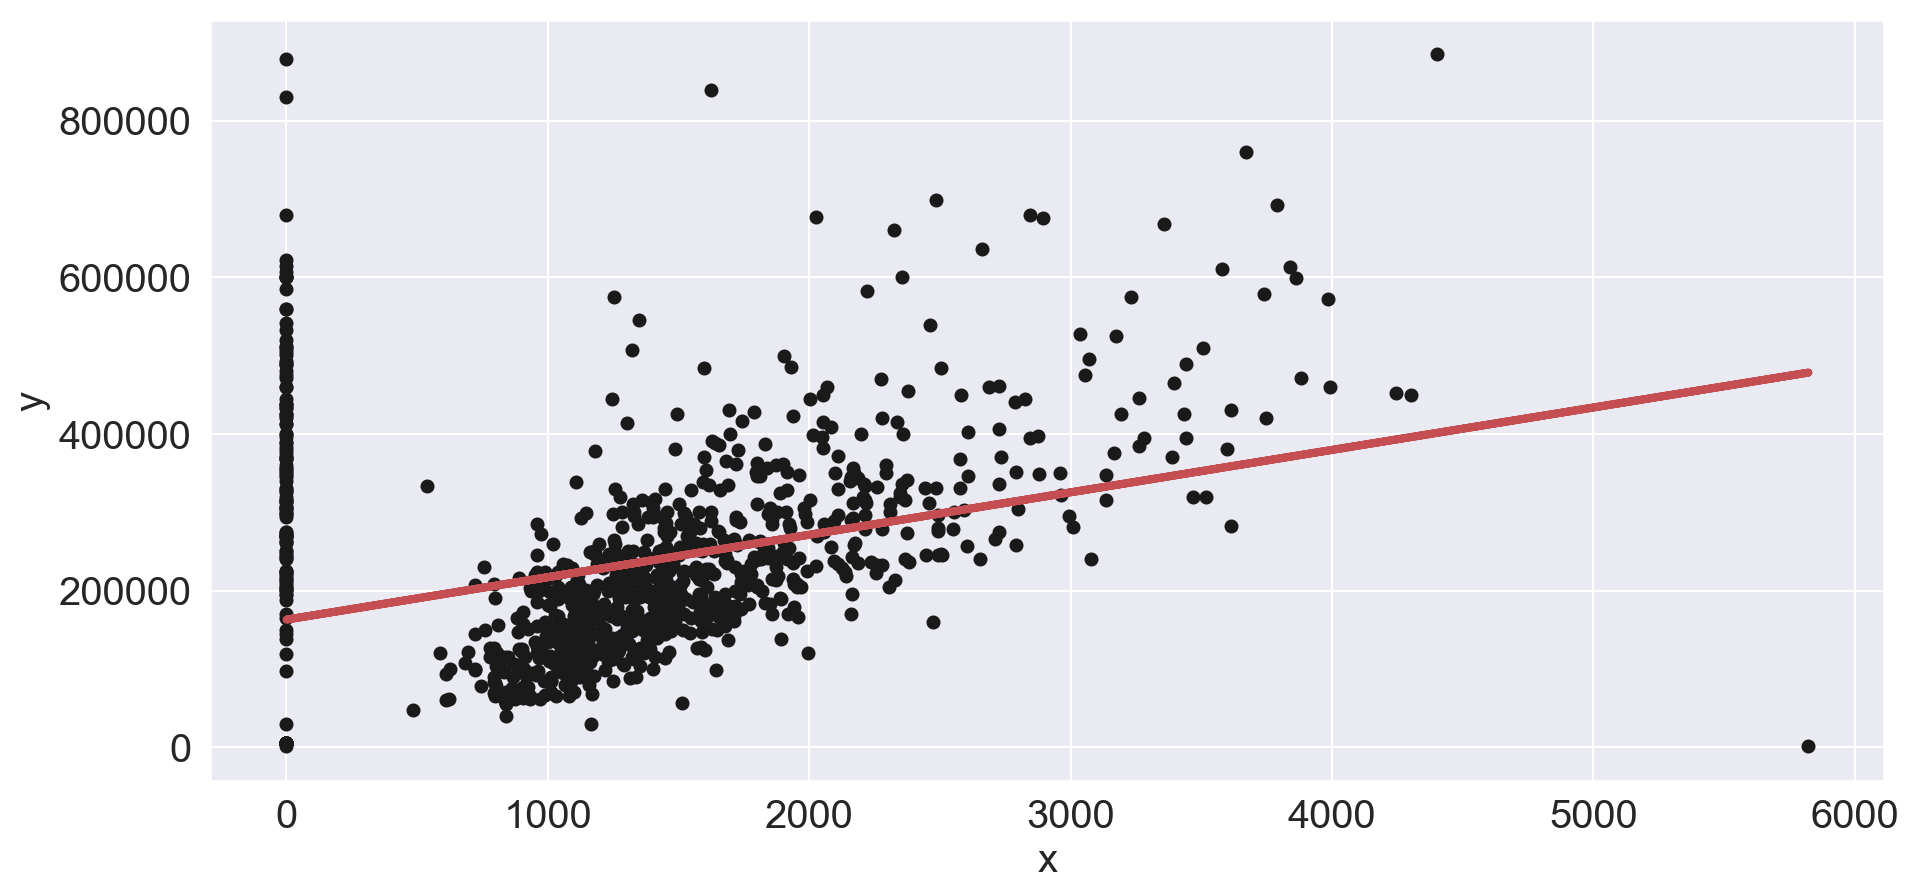

In [46]:
# create a figure
fig = plt.figure(figsize=(15, 7))
# get the axis of that figure
ax = plt.gca()
# plot a scatter plot on it with our data
ax.scatter(x, y, c='k')
ax.plot(df['x'], df['linear_yhat'], color='r', lw=4)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.tick_params(axis='both', labelsize=20)


In [60]:
shd[shd["sq__ft"]==0].shape

(171, 12)

### 6. Interpret the intercept. Interpret the slope.

In [ ]:
# A: 162930.1614069976, 54.15863968853088
#

In [48]:
shd.price.describe()

count       985.000000
mean     234144.263959
std      138365.839085
min        1551.000000
25%      145000.000000
50%      213750.000000
75%      300000.000000
max      884790.000000
Name: price, dtype: float64

### 7: [Bonus] Using the model you came up with in Problem 5, do the following.

- Plot a histogram of the residuals and judge the distribution.
- Plot price versus your predictor in a scatter plot combined with the regression line and vertical lines for the residuals.
- Plot the true values of price versus the predicted values.

In [ ]:
# A:

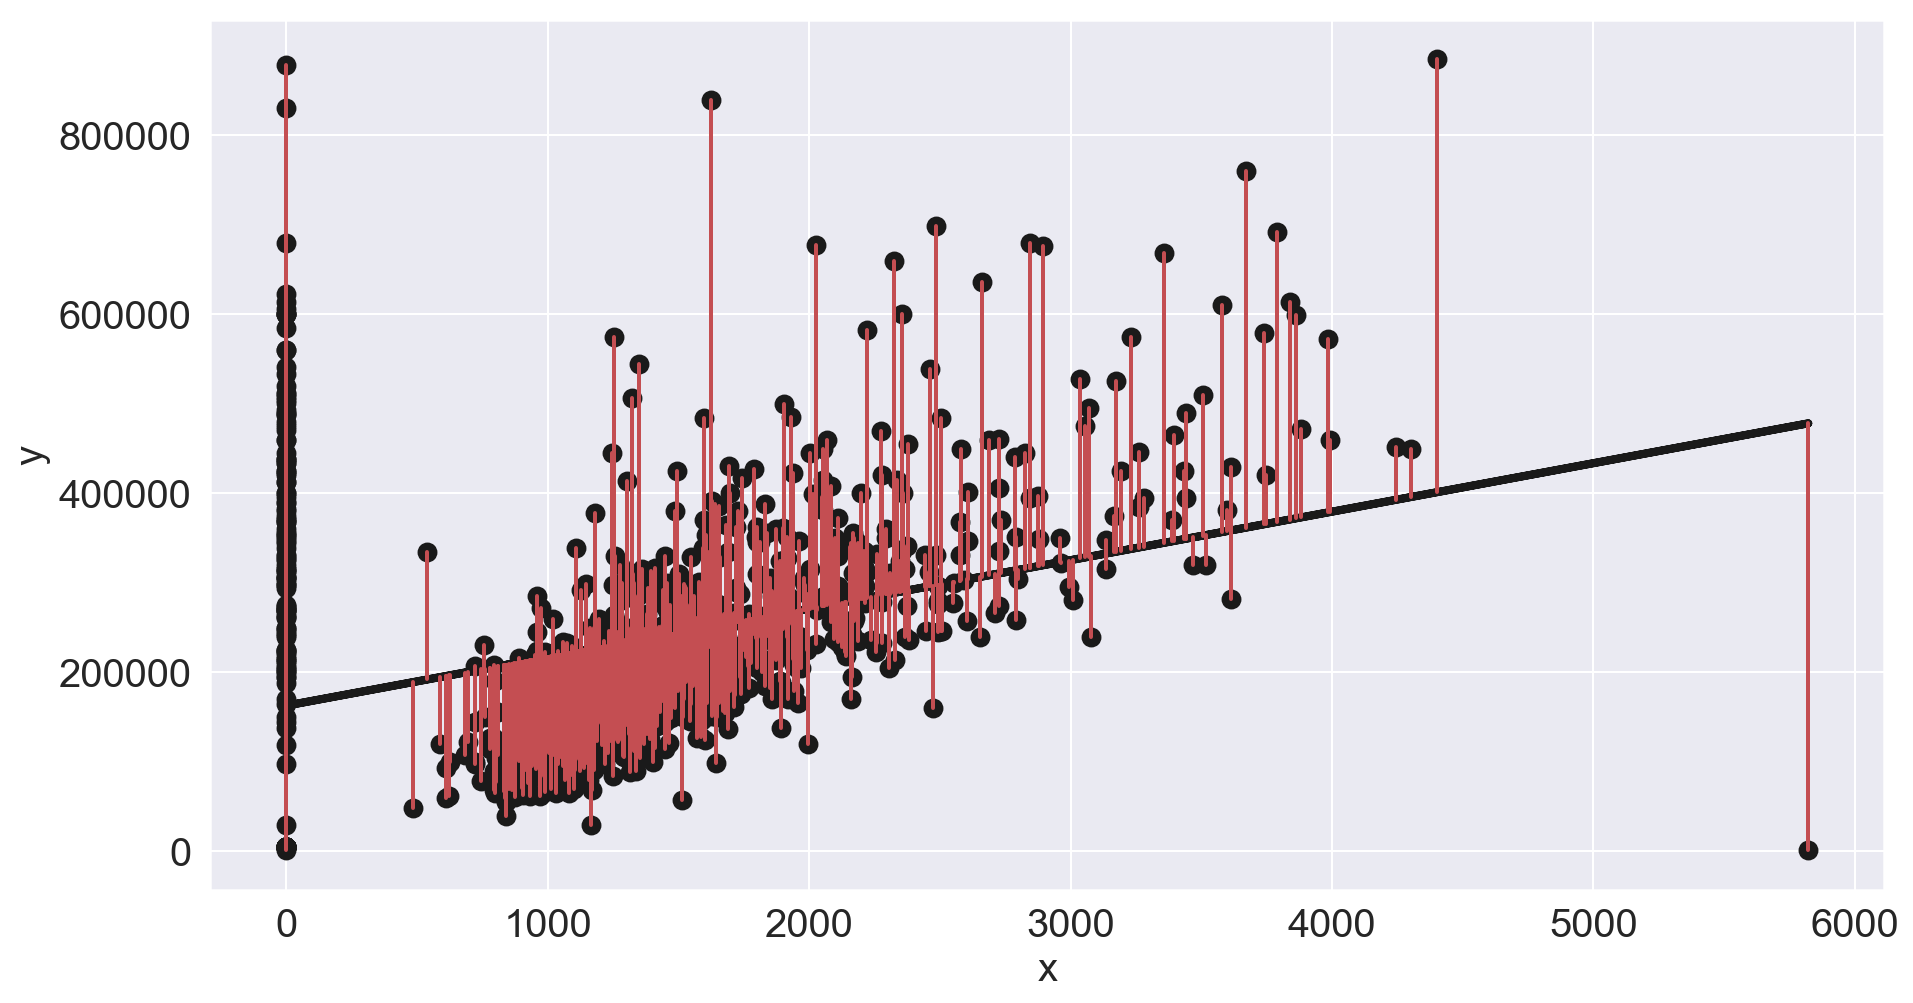

In [50]:
# create a figure
fig = plt.figure(figsize=(15, 8))
# get the axis
ax = fig.gca()
# plot it
ax.scatter(x=df['x'], y=df['y'], c='k', s=80)
ax.plot(df['x'], df['linear_yhat'], color='k', lw=4)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
# iterate over predictions
for index, row in df.iterrows():
    ax.plot((row['x'], row['x']),
            (row['y'], row['linear_yhat']), 'r-', lw=2)
ax.tick_params(axis='both', labelsize=20)


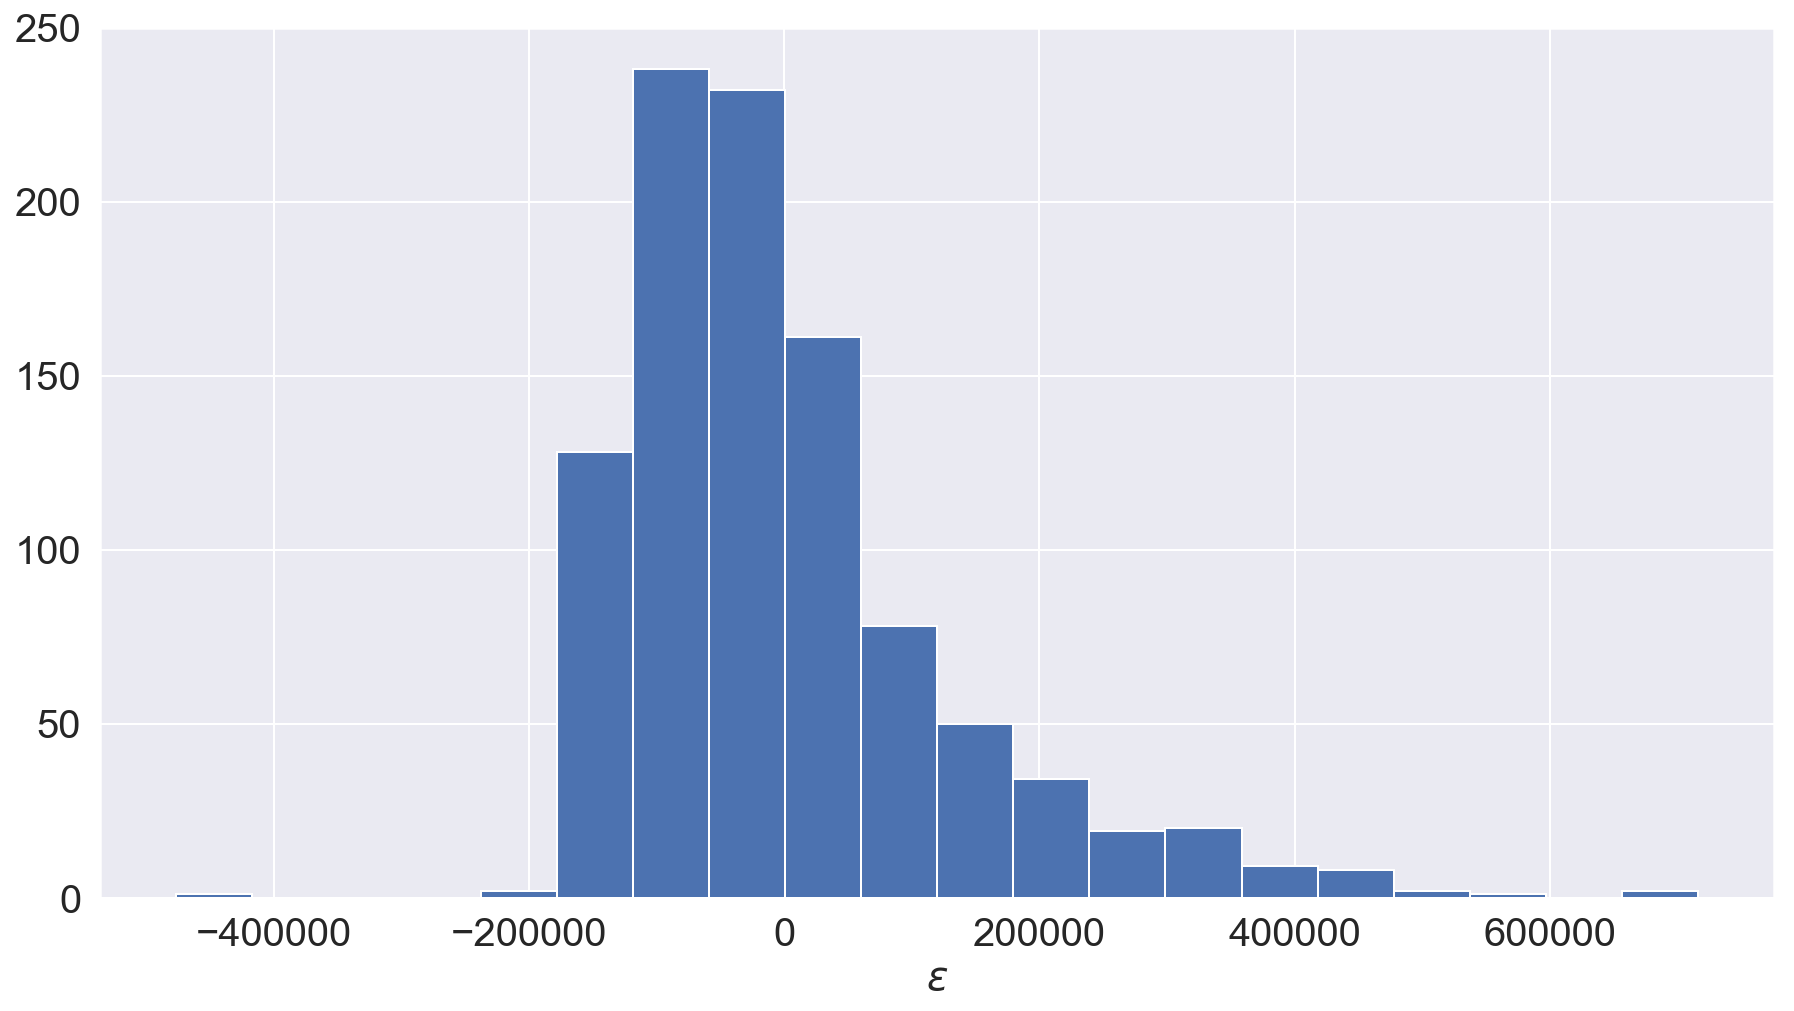

In [51]:
# create a figure
fig = plt.figure(figsize=(15, 8))
# get the axis
ax = fig.gca()
residuals = df['y'] - df['linear_yhat']
ax.hist(residuals, bins=20, color='b')
ax.set_xlabel(r'$\epsilon$',fontsize=20)
ax.tick_params(axis='both', labelsize=20)


In [52]:
residuals.sum()


-1.0244548320770264e-08

In [54]:
residuals.dot(df.x)


-0.00010442733764648438